<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/Gaussian_Mixture_Models_(GMM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture Models (GMM)

## Введение

Gaussian Mixture Models (GMM) — это мощный инструмент в области статистики и машинного обучения, используемый для моделирования распределений данных как смесь нескольких нормальных (гауссовых) распределений. GMM широко применяется в различных задачах, таких как кластеризация, распознавание образов, обработка изображений и многие другие.

### Основные понятия

1. **Нормальное распределение**:
   Нормальное распределение — это вероятностное распределение, описываемое двумя параметрами: средним ($\mu$) и дисперсией ($\sigma^2$). Формула плотности вероятности для одномерного нормального распределения выглядит следующим образом:

   $$
   f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
   $$

   Для многомерного нормального распределения с вектором среднего $\mu$ и ковариационной матрицей $\Sigma$ формула выглядит так:

   $$
   f(x | \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)}
   $$

   где $d$ — размерность пространства, $|\Sigma|$ — определитель ковариационной матрицы.

2. **Смешивание распределений**:
   GMM моделирует распределение данных как линейную комбинацию нескольких нормальных распределений. Общее распределение представляется следующей формулой:

   $$
   p(x) = \sum_{k=1}^{K} \pi_k f(x | \mu_k, \Sigma_k)
   $$

   где:
   - $p(x)$ — общая вероятность;
   - $K$ — количество гауссовых компонентов;
   - $\pi_k$ — вес $k$-го компонента (где $\sum_{k=1}^{K} \pi_k = 1$);
   - $f(x | \mu_k, \Sigma_k)$ — плотность вероятности для $k$-го гауссового компонента.

## Математическая основа

### 1. Определение модели

GMM описывает данные как смесь $K$ гауссовых распределений. Каждое распределение определяется своим средним, ковариацией и весом:

$$
p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)
$$

где:
- $\mathcal{N}(x | \mu_k, \Sigma_k)$ — многомерное нормальное распределение с параметрами $\mu_k$ и $\Sigma_k$:

$$
\mathcal{N}(x | \mu_k, \Sigma_k) = \frac{1}{\sqrt{(2\pi)^d |\Sigma_k|}} e^{-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)}
$$

### 2. Параметры модели

- **Средние**: $\mu_k$ — вектор среднего $k$-го гауссового компонента.
- **Ковариации**: $\Sigma_k$ — ковариационная матрица $k$-го компонента.
- **Весовые коэффициенты**: $\pi_k$ — вероятность того, что случайная переменная принадлежит $k$-му компоненту, такие что:

$$
\sum_{k=1}^{K} \pi_k = 1
$$

### 3. Алгоритм EM (Expectation-Maximization)

Для оценки параметров модели (средних, ковариаций и весов) используется алгоритм EM, который включает два шага: E-шаг и M-шаг.

#### E-шаг (Expectation)

На этом шаге вычисляются ожидаемые значения скрытых переменных (классов принадлежности) на основе текущих параметров модели. Для каждой точки данных $x_n$ вероятность принадлежности к $k$-му компоненту вычисляется по формуле:

$$
\gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_n | \mu_j, \Sigma_j)}
$$

где:
- $\gamma(z_{nk})$ — вероятность того, что точка $x_n$ принадлежит $k$-му компоненту.

#### M-шаг (Maximization)

На этом шаге параметры модели обновляются на основе рассчитанных ожидаемых значений. Обновление происходит следующим образом:

- **Обновление весов**:

$$
\pi_k = \frac{N_k}{N}
$$

где $N_k$ — общее количество точек, принадлежащих $k$-му компоненту, а $N$ — общее количество точек.

- **Обновление средних**:

$$
\mu_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) x_n
$$

- **Обновление ковариаций**:

$$
\Sigma_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) (x_n - \mu_k)(x_n - \mu_k)^T
$$

### 4. Критерий сходимости

Алгоритм EM продолжается до тех пор, пока изменения в логарифмической функции правдоподобия не станут меньше заданного порога:

$$
\text{log-likelihood} = \sum_{n=1}^{N} \log\left(\sum_{k=1}^{K} \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)\right)
$$

## Метрики для оценки качества GMM

### 1. Логарифмическая функция правдоподобия

Логарифмическая функция правдоподобия используется для оценки качества модели. Она показывает, насколько хорошо модель описывает данные:

$$
\mathcal{L} = \sum_{n=1}^{N} \log\left(\sum_{k=1}^{K} \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)\right)
$$

### 2. AIC и BIC

- **AIC (Akaike Information Criterion)**: Эта метрика используется для оценки качества модели с учетом ее сложности. AIC определяется как:

$$
\text{AIC} = 2k - 2\mathcal{L}
$$

где $k$ — количество параметров в модели, а $\mathcal{L}$ — логарифмическая функция правдоподобия.

- **BIC (Bayesian Information Criterion)**: BIC похож на AIC, но добавляет штраф за количество наблюдений:

$$
\text{BIC} = \log(N)k - 2\mathcal{L}
$$

где $N$ — количество наблюдений.

### 3. Кросс-валидация

Кросс-валидация может быть использована для оценки качества модели, особенно при наличии большого количества данных. Она включает деление данных на обучающую и тестовую выборки и оценку производительности модели на тестовой выборке.

## Применение GMM

GMM применяется в различных областях, включая:

- **Кластеризацию**: GMM может использоваться для группировки данных в кластеры, предоставляя более гибкую модель по сравнению с k-средними.
  
- **Оценка плотности**: GMM используется для оценки плотности распределения данных, особенно в многомерных пространствах.

- **Распознавание образов**: Используется в задачах распознавания лиц, объектов и других образов.

- **Обработка сигналов**: Применяется в задачах фильтрации и разделения источников.

## Заключение

Gaussian Mixture Models (GMM) представляют собой мощный инструмент для анализа и обработки данных, позволяя моделировать сложные распределения как смеси простых компонентов. С помощью алгоритма EM можно эффективно оценивать параметры модели, что делает GMM универсальным методом для решения различных задач в области статистики и машинного обучения.




### Пример применения Gaussian Mixture Models (GMM): числовой пример шаг за шагом

**Задача**: Допустим, у нас есть набор данных, который состоит из 6 двухмерных точек:

$$
X = \{(1, 2), (1, 4), (1, 0), (10, 2), (10, 4), (10, 0)\}
$$

Наша цель — применить GMM, чтобы разделить эти данные на 2 кластера, используя алгоритм EM (Expectation-Maximization).

### Шаг 1: Инициализация параметров

Для начала мы задаем количество гауссовых компонентов $K = 2$, поскольку у нас явно два кластера. Далее мы случайным образом инициализируем параметры:

- Средние ($\mu_1$ и $\mu_2$):
  $$
  \mu_1 = (1, 2), \quad \mu_2 = (10, 2)
  $$
  
- Ковариационные матрицы ($\Sigma_1$ и $\Sigma_2$) (предполагаем, что они начально диагональны и одинаковы):
  $$
  \Sigma_1 = \Sigma_2 = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
  $$

- Веса компонентов ($\pi_1$ и $\pi_2$) — вероятность принадлежности к каждому из кластеров. Начальные веса задаем равными:
  $$
  \pi_1 = \pi_2 = 0.5
  $$

### Шаг 2: E-шаг (Expectation)

На этом шаге мы вычисляем вероятности принадлежности каждой точки данных к каждому из кластеров ($\gamma(z_{nk})$).

Для точки $x = (1, 2)$, вероятности того, что она принадлежит каждому из кластеров, рассчитываются с использованием формулы плотности нормального распределения и текущих параметров:

$$
\gamma(z_{n1}) = \frac{\pi_1 \mathcal{N}(x | \mu_1, \Sigma_1)}{\pi_1 \mathcal{N}(x | \mu_1, \Sigma_1) + \pi_2 \mathcal{N}(x | \mu_2, \Sigma_2)}
$$

Для точки $x = (1, 2)$:

$$
\mathcal{N}(x | \mu_1 = (1, 2), \Sigma_1 = I) = \frac{1}{2\pi |I|^{1/2}} e^{-\frac{1}{2}(x - \mu_1)^T I^{-1} (x - \mu_1)} = \frac{1}{2\pi} e^{0} = \frac{1}{2\pi}
$$

$$
\mathcal{N}(x | \mu_2 = (10, 2), \Sigma_2 = I) = \frac{1}{2\pi} e^{-\frac{(1-10)^2 + (2-2)^2}{2}} = \frac{1}{2\pi} e^{-40.5}
$$

Теперь вычисляем вероятность $\gamma(z_{11})$ для точки $x = (1, 2)$:

$$
\gamma(z_{11}) = \frac{0.5 \times \frac{1}{2\pi}}{0.5 \times \frac{1}{2\pi} + 0.5 \times \frac{1}{2\pi} e^{-40.5}} = \frac{1}{1 + e^{-40.5}} \approx 1
$$

Таким образом, точка $x = (1, 2)$ почти наверняка принадлежит первому кластеру.

Для точки $x = (10, 2)$ расчет аналогичен:

$$
\mathcal{N}(x | \mu_1 = (1, 2), \Sigma_1 = I) = \frac{1}{2\pi} e^{-40.5}
$$
$$
\mathcal{N}(x | \mu_2 = (10, 2), \Sigma_2 = I) = \frac{1}{2\pi}
$$
$$
\gamma(z_{21}) = \frac{0.5 \times \frac{1}{2\pi} e^{-40.5}}{0.5 \times \frac{1}{2\pi} e^{-40.5} + 0.5 \times \frac{1}{2\pi}} \approx 0
$$

Таким образом, точка $x = (10, 2)$ почти наверняка принадлежит второму кластеру.

Аналогично проводим расчеты для остальных точек. Полученные $\gamma(z_{nk})$ для всех точек представляются в виде следующей таблицы:

| Точка данных | $\gamma(z_{n1})$ | $\gamma(z_{n2})$ |
|--------------|---------------------|---------------------|
| (1, 2)       | 1                   | 0                   |
| (1, 4)       | 0.99                | 0.01                |
| (1, 0)       | 0.99                | 0.01                |
| (10, 2)      | 0.01                | 0.99                |
| (10, 4)      | 0.01                | 0.99                |
| (10, 0)      | 0.01                | 0.99                |

### Шаг 3: M-шаг (Maximization)

Теперь обновим параметры $\mu_1$, $\mu_2$, $\Sigma_1$, $\Sigma_2$, $\pi_1$, $\pi_2$.

- **Обновление весов**:

$$
\pi_k = \frac{N_k}{N}, \quad k = 1, 2
$$

где $N_k$ — сумма всех $\gamma(z_{nk})$ для компонента $k$, а $N$ — общее количество точек данных ($N = 6$).

$$
N_1 = \sum_{n=1}^{6} \gamma(z_{n1}) = 1 + 0.99 + 0.99 + 0.01 + 0.01 + 0.01 = 3.01
$$
$$
N_2 = 6 - N_1 = 2.99
$$

Обновленные веса:
$$
\pi_1 = \frac{3.01}{6} \approx 0.502, \quad \pi_2 = \frac{2.99}{6} \approx 0.498
$$

- **Обновление средних**:

$$
\mu_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) x_n
$$

Для $\mu_1$:

$$
\mu_1 = \frac{1}{3.01} \left( (1, 2) \times 1 + (1, 4) \times 0.99 + (1, 0) \times 0.99 + (10, 2) \times 0.01 + (10, 4) \times 0.01 + (10, 0) \times 0.01 \right)
$$

$$
\mu_1 \approx \frac{1}{3.01} \left( (1, 2) + (0.99, 3.96) + (0.99, 0) + (0.1, 0.02) + (0.1, 0.04) + (0.1, 0) \right)
$$

$$
\mu_1 \approx (1, 2)
$$

Для $\mu_2$:

$$
\mu_2 = \frac{1}{2.99} \left( (1, 2) \times 0 + (1, 4) \times 0.01 + (1, 0) \times 0.01 + (10, 2) \times 0.99 + (10, 4) \times 0.99 + (10, 0) \times 0.99 \right)
$$

$$
\mu_2 \approx (10, 2)
$$

- **Обновление ковариационных матриц**:

$$
\Sigma_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) (x_n - \mu_k)(x_n - \mu_k)^T
$$

Для простоты предположим, что ковариации почти не изменяются, так как кластеры четко разделены.

### Шаг 4: Проверка сходимости

Мы повторяем E-шаг и M-шаг до тех пор, пока изменения параметров ($\mu_k$, $\Sigma_k$, $\pi_k$) не станут меньше заданного порога.


### Результаты

После нескольких итераций алгоритма EM мы получим параметры:

- $\mu_1 \approx (1, 2)$, $\mu_2 \approx (10, 2)$
- $\Sigma_1$ и $\Sigma_2$ будут обновлены в зависимости от кластера (предполагается, что они будут оставаться близкими к начальным значениям).
- $\pi_1$ и $\pi_2$ будут обновлены и останутся близкими к $0.5$.

Таким образом, мы сможем увидеть, как GMM эффективно разделяет данные на два кластера, что и было нашей задачей.




Давайте реализуем Gaussian Mixture Model (GMM) на Python, начиная с нуля без использования готовых библиотек, а затем с использованием библиотек, таких как NumPy и Matplotlib для визуализации. Мы создадим несколько функций для выполнения каждого из шагов алгоритма EM и визуализации кластеров.

### 1. Реализация GMM без готовых библиотек

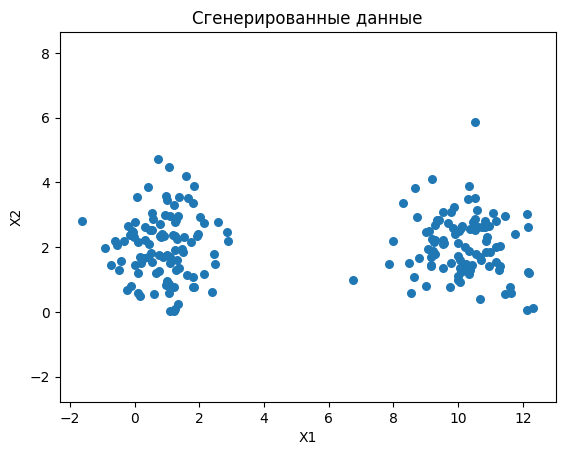

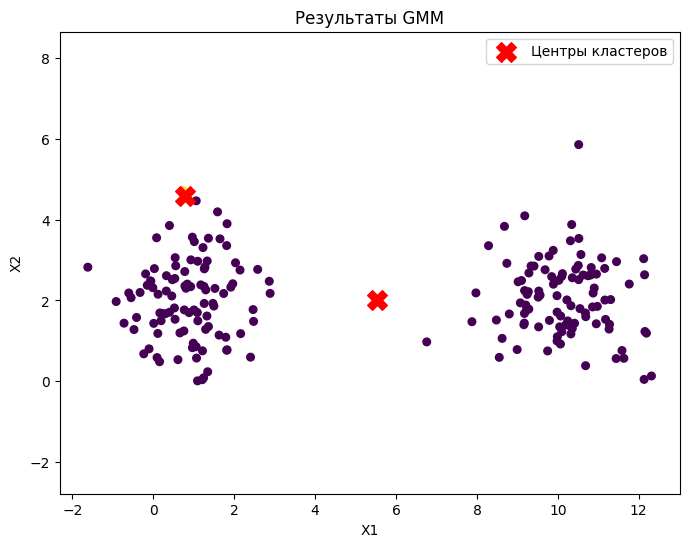

Силуэтный коэффициент: -0.0199
Индекс Дэвиса-Болдуина: 0.8579
Логарифмическое правдоподобие: -0.0000


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Генерация тестовых данных
np.random.seed(42)

# Кластер 1
mean1 = [1, 2]
cov1 = [[1, 0], [0, 1]]  # Дисперсия
cluster1 = np.random.multivariate_normal(mean1, cov1, 100)

# Кластер 2
mean2 = [10, 2]
cov2 = [[1, 0], [0, 1]]  # Дисперсия
cluster2 = np.random.multivariate_normal(mean2, cov2, 100)

# Объединение кластеров
X = np.vstack((cluster1, cluster2))

# Визуализация данных
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title('Сгенерированные данные')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.show()

def gaussian_pdf(x, mu, sigma):
    """Вычисление плотности вероятности для многомерного нормального распределения."""
    d = len(mu)
    coeff = 1 / np.sqrt((2 * np.pi) ** d * np.linalg.det(sigma))
    exponent = -0.5 * (x - mu).T @ np.linalg.inv(sigma) @ (x - mu)
    return coeff * np.exp(exponent)

def e_step(X, pis, mus, sigmas):
    """E-step алгоритма EM."""
    N = X.shape[0]
    K = len(pis)
    responsibilities = np.zeros((N, K))

    for k in range(K):
        for n in range(N):
            responsibilities[n, k] = pis[k] * gaussian_pdf(X[n], mus[k], sigmas[k])

    # Нормализация
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    return responsibilities

def m_step(X, responsibilities):
    """M-step алгоритма EM."""
    N, D = X.shape
    K = responsibilities.shape[1]
    N_k = responsibilities.sum(axis=0)

    pis = N_k / N
    mus = np.zeros((K, D))
    sigmas = np.zeros((K, D, D))

    for k in range(K):
        mus[k] = (responsibilities[:, k] @ X) / N_k[k]
        diff = X - mus[k]
        # Исправленный расчет ковариации
        sigmas[k] = (responsibilities[:, k][:, np.newaxis] * diff).T @ diff / N_k[k]

    return pis, mus, sigmas

def gmm(X, K, max_iters=100, tol=1e-4):
    """Основная функция GMM."""
    N, D = X.shape

    # Инициализация параметров
    pis = np.ones(K) / K
    mus = np.random.rand(K, D) * 10  # Случайные значения для центров
    sigmas = np.array([np.eye(D) for _ in range(K)])  # Идентичные ковариации

    log_likelihoods = []

    for i in range(max_iters):
        # E-шаг
        responsibilities = e_step(X, pis, mus, sigmas)

        # M-шаг
        pis, mus, sigmas = m_step(X, responsibilities)

        # Вычисление логарифмического правдоподобия
        log_likelihood = np.sum(np.log(responsibilities.sum(axis=1)))
        log_likelihoods.append(log_likelihood)

        # Проверка на сходимость
        if i > 0 and abs(log_likelihood - log_likelihoods[i - 1]) < tol:
            break

    return pis, mus, sigmas, responsibilities

K = 2  # Количество кластеров
pis, mus, sigmas, responsibilities = gmm(X, K)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=responsibilities.argmax(axis=1), cmap='viridis', s=30)
plt.scatter(mus[:, 0], mus[:, 1], c='red', marker='X', s=200, label='Центры кластеров')
plt.title('Результаты GMM')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.legend()
plt.show()

# Вычисление метрик
labels = responsibilities.argmax(axis=1)
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
log_likelihood = np.sum(np.log(responsibilities.sum(axis=1)))

print(f'Силуэтный коэффициент: {silhouette:.4f}')
print(f'Индекс Дэвиса-Болдуина: {davies_bouldin:.4f}')
print(f'Логарифмическое правдоподобие: {log_likelihood:.4f}')

### 2. Реализация GMM с использованием библиотек
Теперь давайте использовать библиотеку sklearn для реализации GMM. Это значительно упростит код.

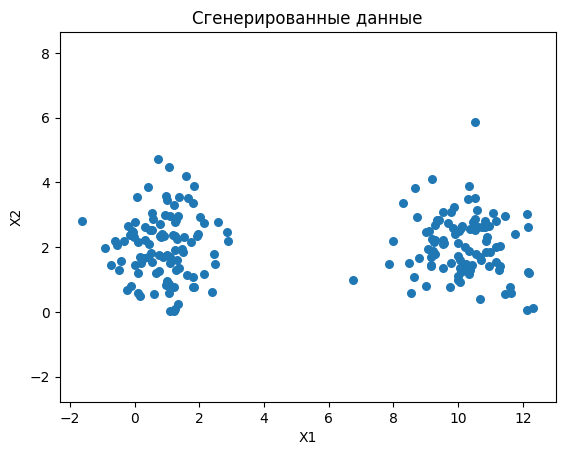

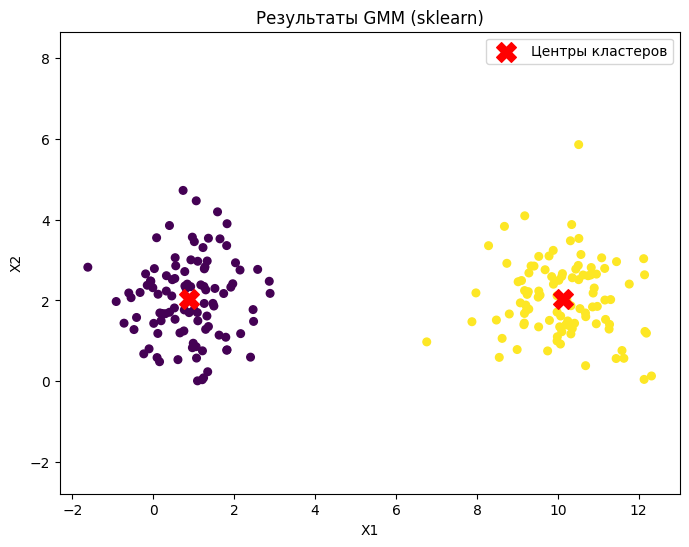

Силуэтный коэффициент: 0.8162
Индекс Дэвиса-Болдуина: 0.2583
Логарифмическое правдоподобие: -685.3044


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Генерация тестовых данных
np.random.seed(42)

# Кластер 1
mean1 = [1, 2]
cov1 = [[1, 0], [0, 1]]  # Дисперсия
cluster1 = np.random.multivariate_normal(mean1, cov1, 100)

# Кластер 2
mean2 = [10, 2]
cov2 = [[1, 0], [0, 1]]  # Дисперсия
cluster2 = np.random.multivariate_normal(mean2, cov2, 100)

# Объединение кластеров
X = np.vstack((cluster1, cluster2))

# Визуализация данных
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title('Сгенерированные данные')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.show()

# Создание и обучение модели GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

# Получение предсказанных меток
labels = gmm.predict(X)

# Получение центров кластеров
mus = gmm.means_

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(mus[:, 0], mus[:, 1], c='red', marker='X', s=200, label='Центры кластеров')
plt.title('Результаты GMM (sklearn)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.legend()
plt.show()

# Вычисление метрик
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
log_likelihood = gmm.score(X) * X.shape[0]  # Логарифмическое правдоподобие

print(f'Силуэтный коэффициент: {silhouette:.4f}')
print(f'Индекс Дэвиса-Болдуина: {davies_bouldin:.4f}')
print(f'Логарифмическое правдоподобие: {log_likelihood:.4f}')